In [2]:
"""Getting data, building a single chart"""
import itertools
from typing import List

import numpy
import matplotlib.pyplot as plt


def build_pie_diagram(tests_result: List[int | float]):
    """Builds chart for 1 test or for average"""
    labels = ['Career', 'Money', 'Skill', 'Timekill']

    def drop_empty(motiv_list):
        labels_indexes_to_drop = [m_i for m_i in motiv_list if m_i == 0]
        labels_indexes_to_drop = labels_indexes_to_drop[::-1]
        for i in labels_indexes_to_drop:
            labels.pop(i)
        return filter(lambda x: x != 0, motiv_list)

    tests_result = list(drop_empty(tests_result))
    if not tests_result:
        return

    def get_percent(results: List[int | float]) -> list[float]:
        total = sum(results)
        percents = [answer / total * 100 for answer in results]
        return percents

    sizes = get_percent(tests_result)
    explode = numpy.zeros(len(tests_result))
    to_explode = max(sizes)
    #  possible multiple motivations
    explode_indexes = [i for i, x in enumerate(sizes) if x == to_explode]
    for i in explode_indexes:
        explode[i] = 0.1

    plt.xkcd()
    figure, ax = plt.subplots()
    ax.pie(sizes, explode=explode, labels=labels, autopct='%.1f')
    if len(explode_indexes) == 1:
        title_personal = labels[explode_indexes[0]]
    elif len(explode_indexes) > 1:
        keys = list(itertools.compress(labels, explode))
        keys_lower = [s.lower() for s in keys]
        title_personal = ", ".join(keys_lower)
    ax.set_title("У вас преобладание за " + title_personal + '.')
    # return plt
    plt.show()

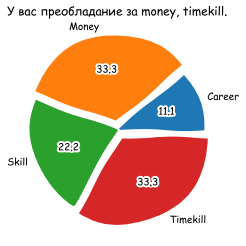

In [3]:
build_pie_diagram([1, 3, 2, 3])